<a href="https://colab.research.google.com/github/dsogden/Quantitative_Finance/blob/main/Residual_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from statsmodels import regression
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math
import yfinance as yf

## Simple Linear Regression

In [3]:
def linreg(X, y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(y, X).fit()
    B0 = model.params[0]
    B1 = model.params[1]
    X = X[:, 1]

    X2 = np.linspace(X.min(), X.max(), 100)
    yhat = X2 * B1 + B0
    plt.scatter(X, y, alpha=1)
    plt.plot(X2, yhat, 'r', alpha=1)
    plt.xlabel('X value')
    plt.ylabel('y value')
    plt.show()

    return model, B0, B1

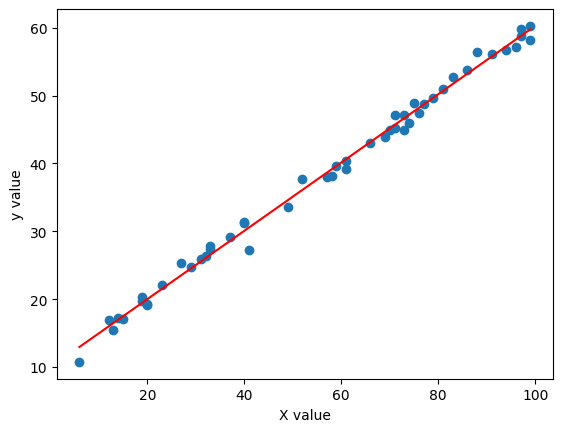

Line of best fit: y = 0.5032227376872116x + 9.946871392686695


In [8]:
n = 50
X = np.random.randint(0, 100, n)
epsilon = np.random.normal(0, 1, n)

y = 10 + 0.5 * X + epsilon

outputs = linreg(X, y)
print(f'Line of best fit: y = {outputs[2]}x + {outputs[1]}')

### Residuals

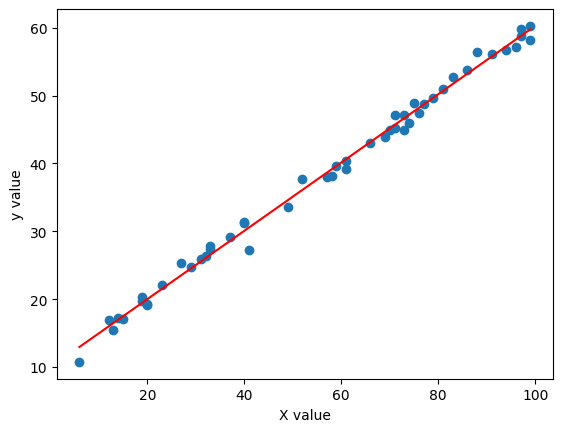

In [20]:
model, B0, B1 = linreg(X, y)
residuals = model.resid

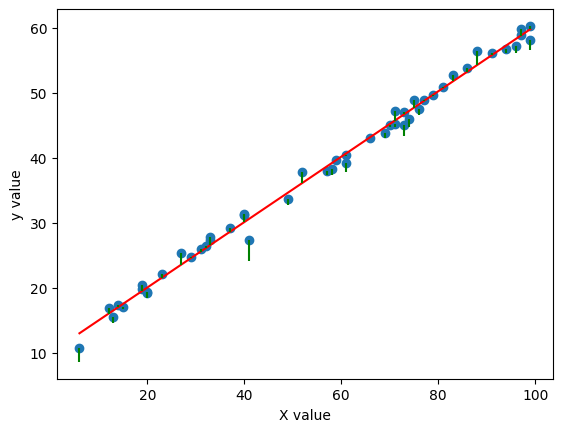

In [25]:
X2 = np.linspace(X.min(), X.max(), 100)
yhat = X2 * B1 + B0
plt.scatter(X, y, alpha=1)
plt.plot(X2, yhat, 'r', alpha=1)
plt.xlabel('X value')
plt.ylabel('y value')
plt.errorbar(X, y, yerr=[np.abs(residuals), 0 * residuals], linestyle="None",color='Green')
plt.show()

## Diagnosing Residuals

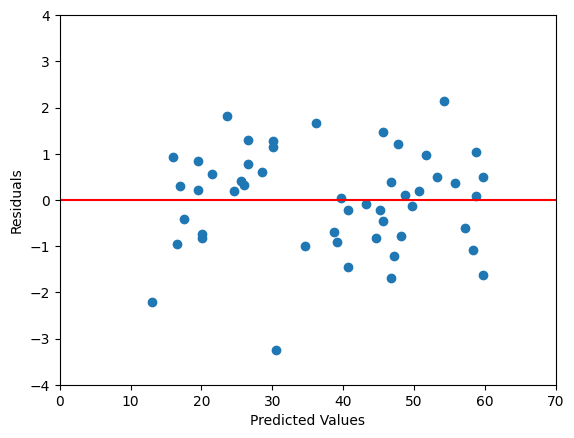

In [30]:
plt.scatter(model.predict(), residuals)
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
# plt.xlim([1, 50])
plt.xlim([0, 70])
plt.ylim([-4, 4])
plt.show()

## Appropriateness of a Linear Model

B0 = 15.31804306443615
B1 = -2.212560039871892


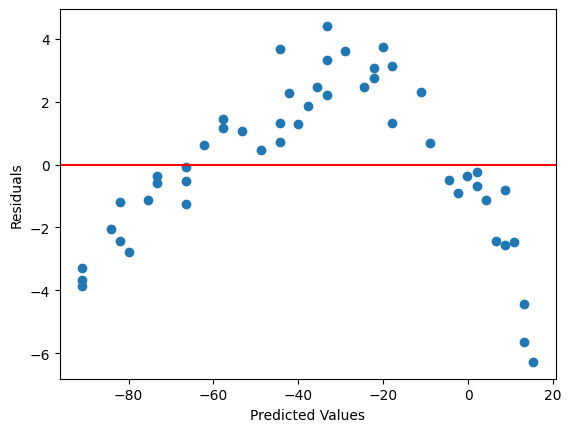

In [33]:
n = 50
X = np.random.randint(0, 50, n)
epsilon = np.random.normal(0, 1, n)
y_nonlinear = 10 - X**1.2 + epsilon

model = regression.linear_model.OLS(y_nonlinear, sm.add_constant(X)).fit()
B0, B1 = model.params[0], model.params[1]
residuals = model.resid

print(f'B0 = {B0}')
print(f'B1 = {B1}')

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals')
plt.show()

## Heteroscedasticity

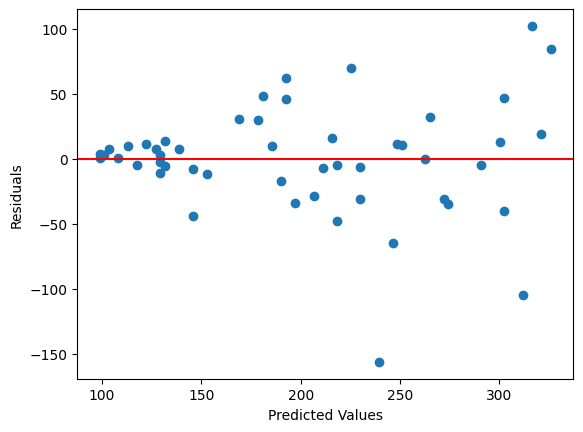

In [35]:
n = 50
X = np.random.randint(0, 100, n)
epsilon = np.random.normal(0, 1, n)
y_hetero = 100 + 2 * X + epsilon * X

model = regression.linear_model.OLS(y_hetero, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values');
plt.ylabel('Residuals')
plt.show()

### Statistical Methods for Detecting Heteroscedasticity

In [39]:
breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('The relationship is not heteroscedastic')
else:
    print('The relationship is heteroscedastic')

0.00980996448421112
The relationship is heteroscedastic


### Adjusting for Heteroscedasticity

In [40]:
# Difference analysis
y_hetero_diff = np.diff(y_hetero)
y_hetero_diff[:10]

array([  68.76907373,  -94.7023159 ,   19.25556646,   60.69107337,
        -61.63021787,  308.96556356, -197.0772002 ,  -18.1566733 ,
        -60.72059429,  151.15752599])

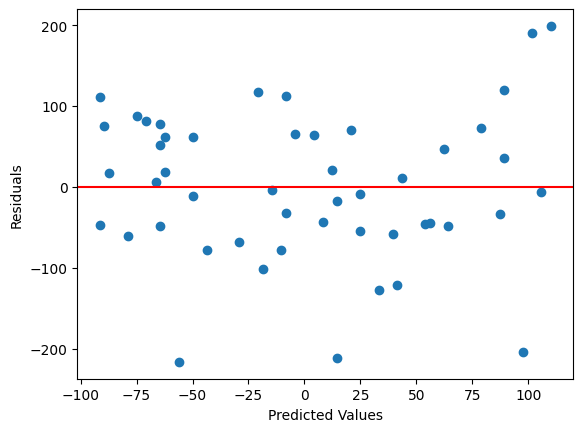

In [42]:
model = regression.linear_model.OLS(y_hetero_diff, sm.add_constant(X[1:])).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [43]:
breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('The relationship is not heteroscedastic')
else:
    print('The relationship is heteroscedastic')

0.09440489132966132
The relationship is not heteroscedastic


### Log transform

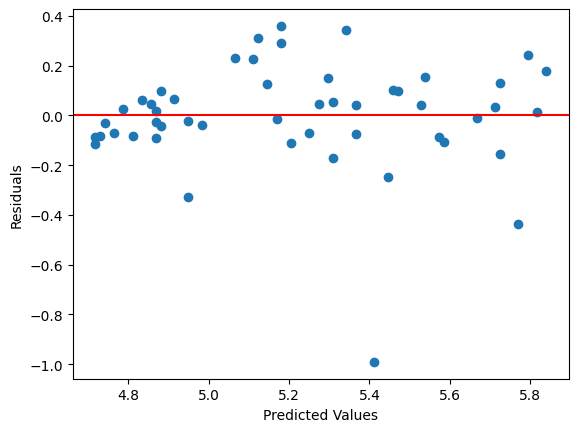

In [44]:
y_hetero_log = np.log(y_hetero)

model = regression.linear_model.OLS(y_hetero_log, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [45]:
breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('The relationship is not heteroscedastic')
else:
    print('The relationship is heteroscedastic')

0.3217274291479463
The relationship is not heteroscedastic


### Box-Cox transformation

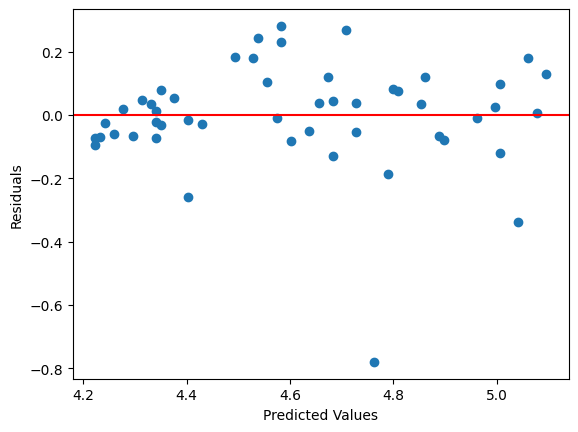

0.34519152293500077
The relationship is not heteroscedastic


In [47]:
y_hetero_bc = stats.boxcox(y_hetero)[0]

model = regression.linear_model.OLS(y_hetero_bc, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('The relationship is not heteroscedastic')
else:
    print('The relationship is heteroscedastic')

## Residuals and Autocorrelation

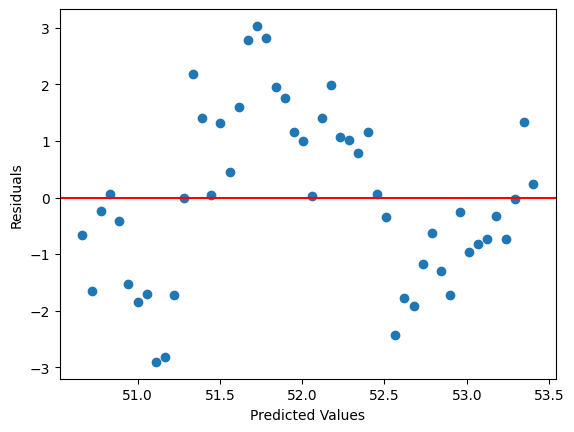

In [48]:
n = 50
X = np.linspace(0, n, n)
y_autocorrelated = np.zeros(n)
y_autocorrelated[0] = 50
for t in range(1, n):
    y_autocorrelated[t] = y_autocorrelated[t - 1] + np.random.normal(0, 1)

model = regression.linear_model.OLS(y_autocorrelated, sm.add_constant(X)).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

### Statistical Methods for Detecting Autocorrelation

In [55]:
ljung_box = smd.acorr_ljungbox(residuals, lags=10)
print(f'Lagrange Multiplier Stats: {ljung_box.lb_stat.values}')
print(f'\nP-values: {ljung_box.lb_pvalue.values}\n')
if any(ljung_box.lb_pvalue < 0.05):
    print('The residuals are autocorrelated')
else:
    print('The residuals are not autocorrelated')

Lagrange Multiplier Stats: [34.55045467 55.07509867 67.26994721 74.62406447 79.43632668 82.4859346
 84.2163402  84.84746437 84.84780354 86.04974276]

P-values: [4.15344517e-09 1.09797962e-12 1.63940029e-14 2.39290514e-15
 1.10094176e-15 1.09428143e-15 1.89634853e-15 5.14444350e-15
 1.74972654e-14 3.23967095e-14]

The residuals are autocorrelated


### Adjusting for Autocorrelation

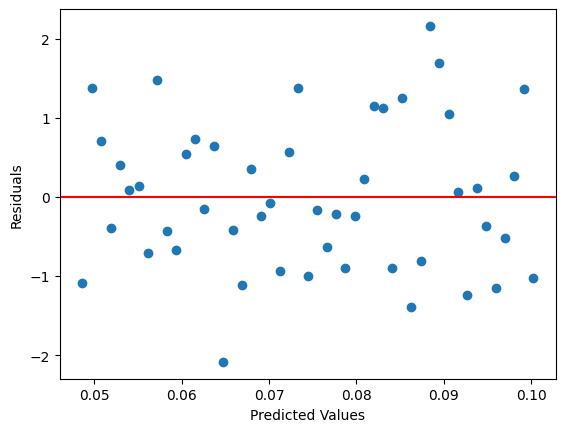

In [57]:
y_autocorrelated_diff = np.diff(y_autocorrelated)

model = regression.linear_model.OLS(y_autocorrelated_diff, sm.add_constant(X[1:])).fit()
B0, B1 = model.params
residuals = model.resid

plt.scatter(model.predict(), residuals);
plt.axhline(0, color='red')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [58]:
ljung_box = smd.acorr_ljungbox(residuals, lags=10)
print(f'Lagrange Multiplier Stats: {ljung_box.lb_stat.values}')
print(f'\nP-values: {ljung_box.lb_pvalue.values}\n')
if any(ljung_box.lb_pvalue < 0.05):
    print('The residuals are autocorrelated')
else:
    print('The residuals are not autocorrelated')

Lagrange Multiplier Stats: [0.0400426  0.46356364 0.89296834 1.52475254 1.63990754 1.65453704
 1.69970686 1.87290064 2.63013074 2.76401748]

P-values: [0.84139731 0.79311915 0.82712437 0.82224801 0.89638171 0.94857684
 0.97458074 0.98466345 0.97717656 0.98644504]

The residuals are not autocorrelated


## Example: Market Beta Calculation

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


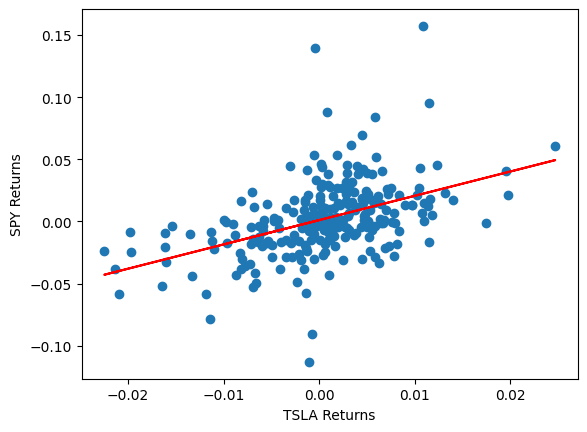

In [59]:
start = '2014-01-01'
end = '2015-01-01'
asset = yf.download('TSLA', start=start, end=end)['Close']
benchmark = yf.download('SPY', start=start, end=end)['Close']

r_a = asset.pct_change()[1:].values
r_b = benchmark.pct_change()[1:].values

r_b = sm.add_constant(r_b)
model = sm.OLS(r_a, r_b).fit()
r_b = r_b[:, 1]
B0, B1 = model.params

A_hat = (B1 * r_b + B0)
plt.scatter(r_b, r_a, alpha=1)
plt.plot(r_b, A_hat, 'r', alpha=1)
plt.xlabel('TSLA Returns')
plt.ylabel('SPY Returns')
plt.show()

In [60]:
print(f'Estimated TSLA beta: {B1}')
residuals = model.resid

Estimated TSLA beta: 1.9533684935756634


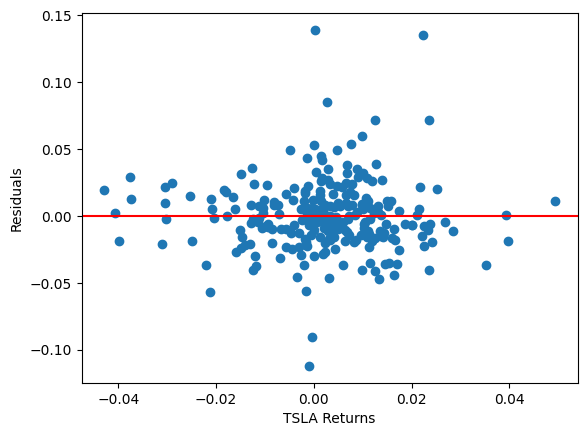

In [61]:
plt.scatter(model.predict(), residuals)
plt.axhline(0, color='red')
plt.xlabel('TSLA Returns')
plt.ylabel('Residuals')
plt.show()

In [62]:
breusch_pagan_p = smd.het_breuschpagan(model.resid, model.model.exog)[1]
print(breusch_pagan_p)
if breusch_pagan_p > 0.05:
    print('The relationship is not heteroscedastic')
else:
    print('The relationship is heteroscedastic')

0.33932440046847556
The relationship is not heteroscedastic


In [64]:
ljung_box = smd.acorr_ljungbox(residuals)
print(f'Lagrange Multiplier Stats: {ljung_box.lb_stat.values}')
print(f'\nP-values: {ljung_box.lb_pvalue.values}\n')
if any(ljung_box.lb_pvalue < 0.05):
    print('The residuals are autocorrelated')
else:
    print('The residuals are not autocorrelated')

Lagrange Multiplier Stats: [2.69378512e-04 4.75121538e-01 7.33985500e-01 9.02078298e-01
 9.73459094e-01 1.04797352e+00 1.67379432e+00 3.81443851e+00
 3.81790491e+00 3.86775278e+00]

P-values: [0.9869051  0.78854897 0.86518258 0.92426246 0.96467795 0.98372814
 0.97567642 0.87346528 0.92298346 0.95311572]

The residuals are not autocorrelated
